# Import Libraries

In [150]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew

# Load Dataset

In [48]:
df_tracks = pd.read_csv('Data/Raw/tracks.csv')

In [49]:
df_artists = pd.read_csv('Data/Raw/artists.csv')

# Data Understanding

In [50]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)


In [51]:
df_tracks.head(10)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,2017-09-22,day,13,0.532,0.517,0,-9.846,1,0.4930,0.54700,0.535,0.0854,0.2390,186.001,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,2014-10-27,day,8,0.750,0.340,5,-12.759,0,0.0326,0.16700,0.648,0.1060,0.1450,120.016,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,2018-06-22,day,10,0.801,0.639,7,-10.681,0,0.1040,0.02900,0.466,0.0688,0.3200,118.052,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,7,0.675,0.543,6,-11.983,0,0.0639,0.04840,0.719,0.1120,0.0374,128.990,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,13,0.761,0.671,11,-13.346,0,0.0418,0.51300,0.917,0.1150,0.1190,120.003,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno
5,7E7POHU96XKXbiubARcPBD,Time Again,1,501737,False,47,1,Jan Blomqvist;Alar;Korolova,single,Time Again,2021-04-16,day,1,0.629,0.865,2,-6.873,1,0.0413,0.00108,0.857,0.0613,0.2420,122.989,501737,4,497.25534,0.721,0.998,0.639,0.550,1025.0,258.0,minimal-techno
6,1YPOzMdeODOgZAKUU7cMS8,Bonus Beat 3,1,193294,False,16,1,Terrence Dixon,single,From There to Here,2018-06-04,day,3,0.807,0.536,11,-18.412,1,0.1550,0.32000,0.972,0.1130,0.7170,120.008,193294,4,193.29410,1.000,1.000,0.008,0.351,386.0,96.0,minimal-techno
7,7kyiQ2oxgT0XX8yhzBWE6t,Cloches,1,419047,False,47,5,Worakls,album,Orchestra,2019-03-08,day,10,0.788,0.516,9,-9.594,0,0.0379,0.06400,0.907,0.0499,0.0998,125.993,419048,4,406.23312,0.841,0.888,0.869,0.697,870.0,217.0,minimal-techno
8,6c6Zt0g2m2s4yLxnK1NazG,Conscious,1,455040,False,39,2,Ann Clue,single,Rumbling Conversation,2015-12-22,day,2,0.800,0.733,0,-11.452,1,0.0515,0.03880,0.833,0.1140,0.1860,124.974,455040,4,450.35684,0.845,0.998,0.017,0.289,944.0,236.0,minimal-techno
9,4J7cSix3jYkSc6n76TgxEJ,We Bring It,1,368372,False,37,1,Jamie Jones;Darius Syrossian,single,We Bring It,2022-09-16,day,2,0.802,0.913,9,-8.508,1,0.0471,0.00104,0.667,0.0616,0.6530,128.984,368372,4,363.94376,0.829,1.000,0.412,0.374,790.0,197.0,minimal-techno


In [52]:
df_tracks.tail()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,2,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,day,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,0.323000,0.3580,0.370,173.958,209655,4,200.10376,0.729,1.00,0.088,0.182,585.0,145.0,edm
109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,1,Danny Avila,single,End Of The Night,2018-11-16,day,1,0.666,0.720,9,-4.483,1,0.0269,0.37100,0.000000,0.0793,0.312,99.970,205724,4,200.98611,0.712,1.00,0.395,0.535,339.0,84.0,edm
109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,3,David Guetta;Akon,album,One More Love,2010-11-22,day,28,0.813,0.627,11,-5.018,0,0.0486,0.07710,0.000616,0.1310,0.801,130.011,195853,4,189.48643,0.814,0.99,0.097,0.330,417.0,106.0,edm
109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,1,Diviners;Philly K.,single,Savannah,2015-11-25,day,1,0.653,0.779,0,-3.133,1,0.0392,0.37200,0.000001,0.0392,0.387,108.074,208698,4,197.41605,0.650,1.00,0.545,0.604,359.0,89.0,edm
109546,0M4HcGtxIWVVH4rSNp6XhQ,Dejalo,1,202826,False,57,5,King,album,Champagne Talk,2022-10-12,day,8,0.768,0.444,1,-8.079,1,0.0811,0.11200,0.003140,0.1450,0.563,92.078,202826,4,196.73688,0.428,1.00,0.847,0.710,304.0,75.0,hip-hop


In [53]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109547 entries, 0 to 109546
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            109547 non-null  object 
 1   name                          109547 non-null  object 
 2   disc_number                   109547 non-null  int64  
 3   duration_ms                   109547 non-null  int64  
 4   explicit                      109547 non-null  bool   
 5   popularity                    109547 non-null  int64  
 6   track_number                  109547 non-null  int64  
 7   artists                       109547 non-null  object 
 8   album_type                    109547 non-null  object 
 9   album_name                    109547 non-null  object 
 10  album_release_date            109547 non-null  object 
 11  album_release_date_precision  109547 non-null  object 
 12  album_total_tracks            109547 non-nul

In [54]:
df_tracks.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars
count,109547.000000,1.095470e+05,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,1.095470e+05,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000,109547.000000
mean,1.025094,2.277441e+05,31.545163,8.585566,18.726300,0.565535,0.638606,5.309703,-8.323598,0.640027,0.084741,0.319907,0.157710,0.214593,0.475156,122.113630,2.277364e+05,3.901604,219.960962,0.446597,0.882240,0.488477,0.510913,456.712626,116.965403
std,0.266291,9.761682e+04,22.943352,18.750768,31.688967,0.173935,0.252942,3.562289,5.071837,0.479994,0.106613,0.334382,0.311296,0.191866,0.259731,30.133061,9.761514e+04,0.436984,96.174360,0.300407,0.211984,0.247190,0.181409,224.652318,59.707947
min,1.000000,8.586000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,8.586670,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,1.000000,1.740020e+05,12.000000,1.000000,6.000000,0.454000,0.467000,2.000000,-10.104000,0.000000,0.035800,0.017200,0.000000,0.098100,0.261000,98.942000,1.740020e+05,4.000000,167.433290,0.172000,0.867000,0.322000,0.399000,315.000000,80.000000
50%,1.000000,2.131790e+05,32.000000,4.000000,12.000000,0.579000,0.681000,5.000000,-7.052000,1.000000,0.048800,0.176000,0.000042,0.132000,0.465000,121.997000,2.131730e+05,4.000000,205.560460,0.418000,0.990000,0.506000,0.522000,417.000000,106.000000
75%,1.000000,2.620130e+05,49.000000,10.000000,21.000000,0.693500,0.853000,8.000000,-5.036000,1.000000,0.084400,0.608000,0.051000,0.275000,0.684000,140.113500,2.620130e+05,4.000000,253.262955,0.730000,1.000000,0.665000,0.636000,554.000000,142.000000
max,14.000000,4.120258e+06,95.000000,475.000000,495.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,4.120258e+06,5.000000,4106.339000,1.000000,1.000000,1.454000,1.000000,7348.000000,2170.000000


In [55]:
df_tracks.nunique()

id                              89562
name                            73471
disc_number                        12
duration_ms                     50594
explicit                            2
popularity                         96
track_number                      302
artists                         31480
album_type                          3
album_name                      46473
album_release_date               8772
album_release_date_precision        3
album_total_tracks                155
danceability                     1174
energy                           2083
key                                12
loudness                        19478
mode                                2
speechiness                      1489
acousticness                     5061
instrumentalness                 5345
liveness                         1722
valence                          1790
tempo                           45604
features_duration_ms            50656
time_signature                      5
start_of_fad

In [56]:
features_tracks = df_tracks.columns
features_artists = df_artists.columns

In [57]:
df_artists.head(10)

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."
5,5EENlafcyIWhoRnYn8pYxq,J.M. Silk,7.0,1171.0,"['chicago house', 'classic house']"
6,3JbuyL5MrYONWyquCPZMts,Sampson Butch Moore,0.0,3.0,[]
7,2TzZ6XTFG1p1PAfhl0crDP,"Steve ""Silk"" Hurley",34.0,6675.0,"['acid house', 'chicago house', 'classic house']"
8,6ySxYu68zTsO5ghsThpGtS,Cosmic Gate,51.0,255617.0,"['german techno', 'german trance', 'progressiv..."
9,7lIBLhQHKay3r1xtO3VtWT,Cajmere,41.0,28213.0,"['chicago house', 'classic house', 'deep house..."


In [58]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30141 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30140 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30140 non-null  float64
 3   followers   30140 non-null  float64
 4   genres      30140 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [59]:
df_artists.nunique()

id            30138
name          29917
popularity       92
followers     21532
genres        11029
dtype: int64

In [60]:
df_tracks.nunique()

id                              89562
name                            73471
disc_number                        12
duration_ms                     50594
explicit                            2
popularity                         96
track_number                      302
artists                         31480
album_type                          3
album_name                      46473
album_release_date               8772
album_release_date_precision        3
album_total_tracks                155
danceability                     1174
energy                           2083
key                                12
loudness                        19478
mode                                2
speechiness                      1489
acousticness                     5061
instrumentalness                 5345
liveness                         1722
valence                          1790
tempo                           45604
features_duration_ms            50656
time_signature                      5
start_of_fad

## Check & DropNA

In [61]:
print(f"df_tracks has {df_tracks.isna().values.sum()} nan values")
print(f"df_artists has {df_artists.isna().values.sum()} nan values")

df_tracks has 0 nan values
df_artists has 6 nan values


In [62]:
df_artists = df_artists.dropna()

In [63]:
print(f"df_tracks has {df_tracks.isna().values.sum()} nan values")
print(f"df_artists has {df_artists.isna().values.sum()} nan values")

df_tracks has 0 nan values
df_artists has 0 nan values


## Check duplicates by rows

In [64]:
print(f"Shape of df_tracks: {df_tracks.shape}")
print(f"Shape of df_artists: {df_artists.shape}")

Shape of df_tracks: (109547, 34)
Shape of df_artists: (30139, 5)


### Exact duplicates by whole row

In [65]:
dup_rows = df_artists[df_artists.duplicated()]
dup_rows

,id,name,popularity,followers,genres
12798,4fEkbug6kZzzJ8eYX6Kbbp,KK,75.0,12587568.0,"['filmi', 'modern bollywood']"
15776,13or1Wf6ipcvSIiurZATvw,La Sonora Dinamita,63.0,867874.0,"['cumbia', 'ranchera', 'salsa colombiana', 'tr..."


In [68]:
df_tracks[df_tracks.duplicated()].shape

(398, 34)

In [66]:
dup = df_artists.loc[(df_artists['name'] == "KK") | (df_artists['name'] == 'La Sonora Dinamita')]
dup

,id,name,popularity,followers,genres
4158,4fEkbug6kZzzJ8eYX6Kbbp,KK,75.0,12587568.0,"['filmi', 'modern bollywood']"
10894,4A0YPZ21iifl4RpvXiDhdq,KK,38.0,86.0,[]
12798,4fEkbug6kZzzJ8eYX6Kbbp,KK,75.0,12587568.0,"['filmi', 'modern bollywood']"
15726,13or1Wf6ipcvSIiurZATvw,La Sonora Dinamita,63.0,867874.0,"['cumbia', 'ranchera', 'salsa colombiana', 'tr..."
15776,13or1Wf6ipcvSIiurZATvw,La Sonora Dinamita,63.0,867874.0,"['cumbia', 'ranchera', 'salsa colombiana', 'tr..."


In [67]:
#artists - delete 2 duplicates
print('before:' ,df_artists.shape)

dup_rows_idx_artists = df_artists[df_artists.duplicated()].index
df_artists = df_artists.drop(dup_rows_idx_artists)
print('after: ',df_artists.shape)

before: (30139, 5)
after:  (30137, 5)


In [69]:
#artists - delete 2 duplicates
print('before:' ,df_tracks.shape)

dup_rows_idx_tracks = df_tracks[df_tracks.duplicated()].index
df_tracks = df_tracks.drop(dup_rows_idx_tracks)
print('after: ',df_tracks.shape)

before: (109547, 34)
after:  (109149, 34)


In [70]:
# check
dup = df_artists.loc[(df_artists['name'] == "KK") | (df_artists['name'] == 'La Sonora Dinamita')]
dup

,id,name,popularity,followers,genres
4158,4fEkbug6kZzzJ8eYX6Kbbp,KK,75.0,12587568.0,"['filmi', 'modern bollywood']"
10894,4A0YPZ21iifl4RpvXiDhdq,KK,38.0,86.0,[]
15726,13or1Wf6ipcvSIiurZATvw,La Sonora Dinamita,63.0,867874.0,"['cumbia', 'ranchera', 'salsa colombiana', 'tr..."


### #Duplicates by name

In [71]:
print('Number of duplicates in df_artists: {}'.format(sum(df_artists.duplicated(subset="name"))))
print('Number of duplicates in df_tracks: {}'.format(sum(df_tracks.duplicated(subset="name"))))

Number of duplicates in df_artists: 220
Number of duplicates in df_tracks: 35678


### #Duplicates by ID

In [72]:
print('Number of duplicates in df_tracks: {}'.format(sum(df_tracks.duplicated(subset="id"))))
print('Number of duplicates in df_artists: {}'.format(sum(df_artists.duplicated(subset="id"))))


Number of duplicates in df_tracks: 19587
Number of duplicates in df_artists: 0


In [73]:
df_tracks[df_tracks.duplicated(subset="id")].sort_values(by="id").head(20)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
91057,001APMDOl3qtx1526T11n1,Better,1,176320,False,0,36,Pink Sweat$;KIRBY,compilation,New RnB,2022-10-21,day,38,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,176321,4,167.67130,0.049,0.945,0.245,0.571,411.0,102.0,chill
82134,001YQlnDSduXd5LgBd66gT,El Tiempo Es Dinero - Remasterizado 2007,1,177266,False,41,9,Soda Stereo,album,Soda Stereo (Remastered),1984-02-06,day,11,0.554,0.921,2,-4.589,1,0.0758,0.01940,0.088100,0.3290,0.700,183.571,177267,1,172.66939,0.333,0.550,0.653,0.624,528.0,132.0,ska
51123,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,1,222973,False,88,2,The Killers,album,Hot Fuss,2004,year,12,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,222973,4,213.19402,0.887,1.000,0.656,0.718,551.0,137.0,alt-rock
73530,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,1,222973,False,88,2,The Killers,album,Hot Fuss,2004,year,12,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,222973,4,213.19402,0.887,1.000,0.656,0.718,551.0,137.0,rock
75966,004h8smbIoAkUNDJvVKwkG,Lovemark,1,219482,True,54,1,Ouse;Powfu,album,Loners Diary,2018-12-19,day,10,0.808,0.331,5,-13.457,1,0.0557,0.13100,0.000000,0.2250,0.337,140.035,219482,4,203.89442,0.722,1.000,0.552,0.460,511.0,128.0,sad
97286,006rHBBNLJMpQs8fRC2GDe,Agora Estou Sofrendo - Ao Vivo,1,260510,False,50,4,Calcinha Preta;Gusttavo Lima,album,CP 25 Anos (Ao Vivo em Aracaju),2020-12-08,day,21,0.605,0.678,0,-3.257,1,0.0311,0.64200,0.000000,0.1570,0.439,125.059,260511,4,254.79256,0.274,0.684,0.193,0.558,541.0,135.0,pagode
79259,006rHBBNLJMpQs8fRC2GDe,Agora Estou Sofrendo - Ao Vivo,1,260510,False,50,4,Calcinha Preta;Gusttavo Lima,album,CP 25 Anos (Ao Vivo em Aracaju),2020-12-08,day,21,0.605,0.678,0,-3.257,1,0.0311,0.64200,0.000000,0.1570,0.439,125.059,260511,4,254.79256,0.274,0.684,0.193,0.558,541.0,135.0,sertanejo
13645,006tmNZLXEXPqdb23wwSN1,Yemyeşil Bir Deniz,1,358173,False,42,9,İlhan İrem,album,Bezginin Gizli Mektupları,2000,year,10,0.486,0.568,9,-9.199,0,0.0417,0.65200,0.000000,0.8340,0.650,127.184,358173,4,352.93750,0.571,0.960,0.384,0.504,753.0,189.0,jazz
32586,006tmNZLXEXPqdb23wwSN1,Yemyeşil Bir Deniz,1,358173,False,42,9,İlhan İrem,album,Bezginin Gizli Mektupları,2000,year,10,0.486,0.568,9,-9.199,0,0.0417,0.65200,0.000000,0.8340,0.650,127.184,358173,4,352.93750,0.571,0.960,0.384,0.504,753.0,189.0,turkish
12125,006tmNZLXEXPqdb23wwSN1,Yemyeşil Bir Deniz,1,358173,False,42,9,İlhan İrem,album,Bezginin Gizli Mektupları,2000,year,10,0.486,0.568,9,-9.199,0,0.0417,0.65200,0.000000,0.8340,0.650,127.184,358173,4,352.93750,0.571,0.960,0.384,0.504,753.0,189.0,j-rock


In [46]:
songs_features = ["energy", "loudness", "danceability", "key", "liveness", "mode", "speechiness", "instrumentalness", "valence","tempo", "features_duration_ms", "popularity", "explicit"]

In [47]:
# Find the number of duplicates based on the song name and musical features
print('Number of duplicates in df_tracks: {}'.format(
    sum(df_tracks.duplicated(subset=["id"] + songs_features ))
))


Number of duplicates in df_tracks: 19470


In [74]:
"""
# Drop duplicates based on song name and musical features
df_tracks_clean = df_tracks.drop_duplicates(subset=["id"] + songs_features, keep='first')

# Verify if the duplicates were removed
print(f"Number of duplicates after removal: {df_tracks_clean.duplicated(subset=['id'] + songs_features).sum()}")
"""

SyntaxError: incomplete input (569137066.py, line 1)

In [75]:

# Define the aggregation dictionary
agg_dict = {
    **{col: 'first' for col in df_tracks.columns if col not in ['id', 'genre']},
    'genre': list
}

# Group by 'id' without setting it as the index
df_tracks_clean = df_tracks.groupby('id', as_index=False).agg(agg_dict)


In [78]:
# Find the number of duplicates based on the song name and musical features
print('Number of duplicates by ID in df_tracks_clean: {}'.format(
    sum(df_tracks_clean.duplicated(subset=["id"]))
))


Number of duplicates by ID in df_tracks_clean: 0


In [82]:
#Yemyeşil Bir Deniz	
df_tracks_clean[(df_tracks_clean['name'] == "Reach Out")]

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
34,00B7SBwrjbycLMOgAmeIU8,Reach Out,1,251588,False,54,3,Red Hot Chili Peppers,album,Return of the Dream Canteen,2022-10-14,day,17,0.663,0.710,11,-5.550,0,0.0599,0.007450,0.00559,0.1470,0.487,120.984,251589,4,240.76772,0.600,0.97,0.301,0.374,503.0,126.0,"[funk, alt-rock, metal]"
17517,1WAixJdtFhs8lPWqvkgfZ5,Reach Out,1,358713,False,22,32,Dougal;Gammer;Cat Knight,compilation,25 Years of Dougal,2015-09-18,day,36,0.484,0.958,10,-2.991,0,0.0675,0.000414,0.00418,0.0914,0.114,170.053,358713,4,351.35855,0.522,1.00,0.675,0.561,996.0,250.0,[happy]


In [83]:
df_duplicati = df_artists[df_artists.duplicated(subset='name', keep=False)]
df_duplicati_sorted = df_duplicati.sort_values(by="name")
df_duplicati_sorted.head(223)

,id,name,popularity,followers,genres
23233,4zPCP1wMTDpEWsMWtMvPv5,A Forest Mighty Black,26.0,702.0,[]
23254,0kvh70DV0fgXwIVVtwNs9y,A Forest Mighty Black,6.0,8217.0,['trip hop']
7862,2s79xe5F6eUQkjwjww27Fh,ABC,50.0,359430.0,"['dance rock', 'new romantic', 'new wave', 'ne..."
8018,4rEDJ9ob6KcrCrREd122rK,ABC,8.0,71.0,[]
28130,4XwGPoIgGhrnfSqa7slAkZ,AC15,11.0,0.0,[]
28085,3njvcD5n5WTXVIEsdNrwuK,AC15,12.0,243.0,[]
18987,3OyFl7Z1rC5MigCR1hwC2r,Aamir Khan,30.0,3634.0,['indian folk']
12756,0Tn7oEmE8zDUR340Doo9zl,Aamir Khan,49.0,214502.0,['classic bollywood']
28548,10wjV72OetIdsUQEcjSnOd,Akcent,45.0,62147.0,['classic disco polo']
24818,57Pw3FSi1qi2fOY4wKOKjK,Akcent,49.0,179550.0,"['classic disco polo', 'romanian house', 'roma..."


Cleaning df_artists through a group by

In [84]:
#gruop by based on name, keeping row with biggest popularity
df_artists_clean = df_artists.loc[df_artists.groupby("name")["popularity"].idxmax()]

# Reset index if needed
df_artists_clean = df_artists_clean.reset_index(drop=True)


In [85]:
print(f"df_artists shape before groupby {df_artists.shape}")
print(f"df_artists shape before groupby {df_artists_clean.shape}")


df_artists shape before groupby (30137, 5)
df_artists shape before groupby (29917, 5)


In [86]:
print(30137-29917)

220


In [87]:
df_artists_clean.head(50)

,id,name,popularity,followers,genres
0,6KJtK1U4TEYXQgg65JYAJI,!nvite,27.0,115.0,['study beats']
1,2cez574BwRD00PGEbNl4SH,"""Cats"" 1983 Broadway Cast",33.0,3966.0,[]
2,75IQWXwH2zVeP5XdXcgSyZ,"""Little"" Jimmie Dickens",1.0,72.0,[]
3,1BvIpQ4GVjwT0TbvcRbkIJ,"""Pepo"" San Martín",0.0,77.0,[]
4,6XYqhT02pSA6p3BoYe9P63,"""Puppy Dog Pals"" Cast",42.0,25550.0,"[""children's music"", 'movie tunes']"
5,2eS8sUGABAZ6um3P2gfhBq,"""Sax"" Maldita Vecindad",22.0,245.0,[]
6,4a3dzAbCR71I5J4pvXG5ac,"""The Phantom Of The Opera"" 1990 German Cast",19.0,26.0,[]
7,1bDWGdIC2hardyt55nlQgG,"""Weird Al"" Yankovic",56.0,781273.0,"['comedy rock', 'comic', 'parody']"
8,0xbZ81HNcwUakITOS0WGBa,#Kids,9.0,119.0,[]
9,5IbEL2xjRtKsunfmsahLuO,$NOT,67.0,1390045.0,"['aesthetic rap', 'cloud rap', 'florida rap', ..."


In [88]:
df_artists_clean.nunique()

id            29917
name          29917
popularity       92
followers     21483
genres        11009
dtype: int64

In [89]:
df_artists_clean.sort_values(by=['popularity'], ascending=False).head(10)

,id,name,popularity,followers,genres
25516,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100.0,82377431.0,['pop']
7298,3TVXtAsR1Inumwj472S9r4,Drake,94.0,78233981.0,"['canadian hip hop', 'canadian pop', 'hip hop'..."
26472,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,94.0,69417099.0,"['canadian contemporary r&b', 'canadian pop', ..."
27106,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94.0,23519791.0,"['hip hop', 'rap', 'slap house']"
2524,4q3ewBCX7sLwd24euuV69X,Bad Bunny,94.0,72659297.0,"['reggaeton', 'trap latino', 'urbano latino']"
14561,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,89.0,26534532.0,"['art pop', 'pop']"
79,1URnnhqYAYcrqrcwql10ft,21 Savage,89.0,14455611.0,"['atl hip hop', 'hip hop', 'rap', 'trap']"
8661,2LRoIwlKmHjgvigdNGBHNo,Feid,89.0,6730168.0,"['colombian pop', 'pop reggaeton', 'reggaeton ..."
20805,246dkjvS1zLTtiykXe5h60,Post Malone,89.0,41614935.0,"['dfw rap', 'melodic rap', 'pop', 'rap']"
3152,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,88.0,84331151.0,"['art pop', 'electropop', 'pop']"


In [90]:
df_tracks_clean.sort_values(by=['popularity'], ascending=False).head(10)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
46902,45OX2jjEw1l7lOFJfDP9fv,MONEY,1,168227,False,95,2,LISA,single,LALISA,2021-09-10,day,2,0.826,0.55300,1,-10.121,0,0.2340,0.16300,0.000041,0.1350,0.400,140.037,168228,4,162.20880,0.789,0.989,0.043,0.253,381.0,95.0,"[k-pop, pop]"
29880,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,1,90228,False,94,1,White Noise Baby Sleep;White Noise for Babies,album,Best White Noise for Baby Sleep - Loopable wit...,2017-01-08,day,7,0.000,0.00342,8,-28.460,1,0.0000,0.79100,1.000000,0.1110,0.000,0.000,90228,0,90.22821,0.000,0.000,0.000,0.116,0.0,0.0,[sleep]
56346,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1,175238,True,94,1,David Guetta;Bebe Rexha,single,I'm Good (Blue),2022-08-26,day,2,0.561,0.96500,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4,163.43945,0.808,0.789,0.898,0.773,368.0,91.0,[pop]
63566,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,1,183956,False,94,12,Arctic Monkeys,album,AM,2013-09-09,day,12,0.464,0.41700,0,-9.345,0,0.0256,0.13600,0.022000,0.0974,0.479,67.528,183956,4,174.09161,0.097,1.000,0.545,0.533,202.0,50.0,"[indie, garage, rock]"
6017,0WtM2NBVQNNJLh6scP13H8,Calm Down (with Selena Gomez),1,239317,False,93,1,Rema;Selena Gomez,single,Calm Down (with Selena Gomez),2022-08-25,day,1,0.801,0.80600,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,239318,4,231.09079,0.492,1.000,0.593,0.597,424.0,105.0,[pop]
53912,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,1,148485,False,93,1,OneRepublic,single,I Ain’t Worried (Music From The Motion Picture...,2022-05-13,day,1,0.704,0.79700,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,145.26984,0.795,1.000,0.533,0.589,339.0,83.0,"[pop, rock, piano]"
84675,7MXVkk9YMctZqd1Srtv4MB,Starboy,1,230453,True,93,1,The Weeknd;Daft Punk,album,Starboy,2016-11-25,day,18,0.679,0.58700,7,-7.015,1,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453,4,221.72736,0.338,1.000,0.608,0.605,706.0,176.0,[pop]
48519,4Dvkj6JhhA12EX05fT7y2e,As It Was,1,167303,False,92,4,Harry Styles,album,Harry's House,2022-05-20,day,13,0.520,0.73100,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303,4,159.75330,0.510,1.000,0.156,0.357,474.0,118.0,[pop]
33265,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",1,198937,False,92,1,Bizarrap;Quevedo,single,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,day,1,0.621,0.78200,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4,192.98685,0.723,0.973,0.379,0.564,421.0,105.0,[hip-hop]
17870,1Y3LN4zO1Edc2EluIoSPJN,Until I Found You (with Em Beihold) - Em Beiho...,1,176440,False,92,1,Stephen Sanchez;Em Beihold,single,Until I Found You (Em Beihold Version),2022-04-22,day,1,0.551,0.55000,10,-5.339,1,0.0286,0.77700,0.000000,0.2020,0.342,101.190,176440,3,164.67592,0.272,1.000,0.955,0.726,292.0,96.0,"[songwriter, singer-songwriter]"


In [91]:
df_tracks.sort_values(by=['popularity'], ascending=False).head(5)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
62869,45OX2jjEw1l7lOFJfDP9fv,MONEY,1,168227,False,95,2,LISA,single,LALISA,2021-09-10,day,2,0.826,0.55300,1,-10.121,0,0.2340,0.16300,0.000041,0.1350,0.400,140.037,168228,4,162.20880,0.789,0.989,0.043,0.253,381.0,95.0,pop
13984,45OX2jjEw1l7lOFJfDP9fv,MONEY,1,168227,False,95,2,LISA,single,LALISA,2021-09-10,day,2,0.826,0.55300,1,-10.121,0,0.2340,0.16300,0.000041,0.1350,0.400,140.037,168228,4,162.20880,0.789,0.989,0.043,0.253,381.0,95.0,k-pop
83090,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,1,90228,False,94,1,White Noise Baby Sleep;White Noise for Babies,album,Best White Noise for Baby Sleep - Loopable wit...,2017-01-08,day,7,0.000,0.00342,8,-28.460,1,0.0000,0.79100,1.000000,0.1110,0.000,0.000,90228,0,90.22821,0.000,0.000,0.000,0.116,0.0,0.0,sleep
62967,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1,175238,True,94,1,David Guetta;Bebe Rexha,single,I'm Good (Blue),2022-08-26,day,2,0.561,0.96500,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4,163.43945,0.808,0.789,0.898,0.773,368.0,91.0,pop
41954,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,1,183956,False,94,12,Arctic Monkeys,album,AM,2013-09-09,day,12,0.464,0.41700,0,-9.345,0,0.0256,0.13600,0.022000,0.0974,0.479,67.528,183956,4,174.09161,0.097,1.000,0.545,0.533,202.0,50.0,garage


In [92]:
df_tracks.shape

(109149, 34)

In [93]:
df_tracks_clean.shape

(89562, 34)

In [94]:
df_artists.shape

(30137, 5)

In [95]:
df_artists_clean.shape

(29917, 5)

# Merging the two datasets

In [96]:
# preparing features with multiple values in each cell
# split and create a list
def split_artists(row):
    return row['artists'].split(';')


df_tracks_clean['artists'] = df_tracks_clean.apply(split_artists, axis=1)


In [110]:
df_tracks_clean['artists'].head()

0                          [Rill]
1                     [Glee Cast]
2     [Paul Kalkbrenner, Pig&Dan]
3    [Jordan Sandhu, Bunty Bains]
4              [Paul Kalkbrenner]
Name: artists, dtype: object

In [111]:
df_artists_clean.head(5)

,id,name,popularity,followers,genres
0,6KJtK1U4TEYXQgg65JYAJI,!nvite,27.0,115.0,['study beats']
1,2cez574BwRD00PGEbNl4SH,"""Cats"" 1983 Broadway Cast",33.0,3966.0,[]
2,75IQWXwH2zVeP5XdXcgSyZ,"""Little"" Jimmie Dickens",1.0,72.0,[]
3,1BvIpQ4GVjwT0TbvcRbkIJ,"""Pepo"" San Martín",0.0,77.0,[]
4,6XYqhT02pSA6p3BoYe9P63,"""Puppy Dog Pals"" Cast",42.0,25550.0,"[""children's music"", 'movie tunes']"


In [112]:
df = df_tracks_clean.copy()

In [113]:
df.head(10)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,0000vdREvCVMxbQTkS888c,Lolly,1,160725,True,35,1,[Rill],single,Lolly,2022-09-23,day,1,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.003010,0.1540,0.432,104.042,160726,4,154.11664,0.578,1.000,0.685,0.583,276.0,67.0,[german]
1,000CC8EParg64OmTxVnZ0p,It's All Coming Back To Me Now (Glee Cast Vers...,1,322933,False,49,10,[Glee Cast],album,Glee Love Songs,2021-02-11,day,100,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.000000,0.1170,0.341,178.174,322933,4,313.21976,0.030,0.659,0.712,0.717,937.0,238.0,[club]
2,000Iz0K615UepwSJ5z2RE5,Böxig Leise - Pig&Dan Remix,1,515360,False,0,5,"[Paul Kalkbrenner, Pig&Dan]",album,X,2014-05-30,day,11,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.181000,0.1110,0.108,119.997,515360,4,474.23273,0.832,0.996,0.052,0.322,1025.0,257.0,[minimal-techno]
3,000RDCYioLteXcutOjeweY,Teeje Week,1,190203,False,62,1,"[Jordan Sandhu, Bunty Bains]",single,Teeje Week,2018-02-12,day,1,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.000000,0.0825,0.839,161.721,190203,4,183.53633,0.103,1.000,0.339,0.473,501.0,124.0,[hip-hop]
4,000qpdoc97IMTBvF8gwcpy,Tief,1,331240,False,20,9,[Paul Kalkbrenner],album,Zeit,2001-10-08,day,11,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.720000,0.0916,0.234,129.971,331240,4,321.92145,0.622,1.000,0.011,0.160,699.0,175.0,[minimal-techno]
5,0017XiMkqbTfF2AUOzlhj6,Thanksgiving Chicken,1,127040,True,24,6,[Chad Daniels],album,Busy Being Awesome,2009-01-27,day,19,0.536,0.780,5,-9.449,0,0.9450,0.792000,0.000000,0.7350,0.452,173.912,127040,3,127.04000,0.036,0.050,0.038,0.203,365.0,120.0,[comedy]
6,001APMDOl3qtx1526T11n1,Better,1,176320,False,0,36,"[Pink Sweat$, KIRBY]",compilation,New RnB,2022-10-21,day,38,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,176321,4,167.67130,0.049,0.945,0.245,0.571,411.0,102.0,"[soul, chill]"
7,001YQlnDSduXd5LgBd66gT,El Tiempo Es Dinero - Remasterizado 2007,1,177266,False,41,9,[Soda Stereo],album,Soda Stereo (Remastered),1984-02-06,day,11,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,177267,1,172.66939,0.333,0.550,0.653,0.624,528.0,132.0,"[punk-rock, ska]"
8,001pyq8FLNSL1C8orNLI0b,Poor Man,1,214600,False,31,3,[Old Crow Medicine Show],album,O.C.M.S.,2004-01-17,day,11,0.580,0.290,2,-11.942,1,0.0272,0.261000,0.000000,0.1250,0.497,91.321,214600,4,207.71991,0.000,1.000,0.239,0.520,320.0,79.0,[bluegrass]
9,002qpSULhHAw6DGqFxbaO1,Love Generation,1,410666,False,19,4,[Tokyo Ghetto Pussy],album,Disco 2001,1995,year,11,0.531,0.950,9,-9.744,0,0.0433,0.001220,0.826000,0.0613,0.553,159.974,410667,4,403.98657,0.772,0.925,0.531,0.447,1084.0,271.0,[happy]


In [116]:
# Function to extract popularity, followers, and merged genres for multiple artists
def extract_artist_info(row):
    artists = row['artists']  # Takes the full list of artists for the track
    
    # Filter artist info from df_artists_clean based on artist names
    artist_info = df_artists_clean[df_artists_clean['name'].isin(artists)]
    
    if artist_info.empty:
        # Case when none of the artists are found in the artists dataset
        return pd.Series({'popularity': None, 'followers': None, 'genre': None})
    else:
        # Calculate mean popularity and followers across all matched artists
        popularity_mean = artist_info['popularity'].mean()
        followers_mean = artist_info['followers'].mean()
        
        # Union genres from all matched artists, remove duplicates
        all_genres = artist_info['genres'].explode().dropna().unique()  # Flatten and get unique genres
        genre = ', '.join(sorted(all_genres)) if len(all_genres) > 0 else None  # Join genres as a string
        
        return pd.Series({'popularity': popularity_mean, 'followers': followers_mean, 'genre': genre})

# Apply the function to the DataFrame of tracks
df[['popularity_artist', 'followers_artist', 'genre_artist']] = df.apply(extract_artist_info, axis=1)


In [119]:
df.head()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_artist,followers_artist,genre_artist
0,0000vdREvCVMxbQTkS888c,Lolly,1,160725,True,35,1,[Rill],single,Lolly,2022-09-23,day,1,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,160726,4,154.11664,0.578,1.000,0.685,0.583,276.0,67.0,[german],45.0,16826.0,[]
1,000CC8EParg64OmTxVnZ0p,It's All Coming Back To Me Now (Glee Cast Vers...,1,322933,False,49,10,[Glee Cast],album,Glee Love Songs,2021-02-11,day,100,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,322933,4,313.21976,0.030,0.659,0.712,0.717,937.0,238.0,[club],67.0,1517867.0,"['glee club', 'post-teen pop']"
2,000Iz0K615UepwSJ5z2RE5,Böxig Leise - Pig&Dan Remix,1,515360,False,0,5,"[Paul Kalkbrenner, Pig&Dan]",album,X,2014-05-30,day,11,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,515360,4,474.23273,0.832,0.996,0.052,0.322,1025.0,257.0,[minimal-techno],50.0,629106.0,"['dark techno', 'minimal techno', 'spanish tec..."
3,000RDCYioLteXcutOjeweY,Teeje Week,1,190203,False,62,1,"[Jordan Sandhu, Bunty Bains]",single,Teeje Week,2018-02-12,day,1,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,190203,4,183.53633,0.103,1.000,0.339,0.473,501.0,124.0,[hip-hop],56.5,1396958.0,"['punjabi pop'], []"
4,000qpdoc97IMTBvF8gwcpy,Tief,1,331240,False,20,9,[Paul Kalkbrenner],album,Zeit,2001-10-08,day,11,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,331240,4,321.92145,0.622,1.000,0.011,0.160,699.0,175.0,[minimal-techno],62.0,1172268.0,"['electronica', 'german techno', 'leipzig elec..."


In [120]:
df[df['popularity_artist'].isna()]

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_artist,followers_artist,genre_artist
51549,4UXIejXKvrHnbKoCNxojQA,Drinking On A Tuesday,1,196707,False,42,1,[Patrick Brasca],single,Drinking On A Tuesday,2021-12-14,day,1,0.665,0.740,5,-5.705,1,0.0319,0.142,0.00000,0.231,0.914,123.054,196707,4,192.94621,0.896,1.0,0.671,0.559,400.0,99.0,[mandopop],NaN,NaN,None
59587,5CIHSAYZZ9ppV7wCDfBEcV,Matemática,1,190586,False,51,6,[ReStarT],album,Geração Z,2011-10-20,day,12,0.729,0.518,6,-10.189,0,0.0643,0.190,0.00001,0.240,0.858,173.906,190587,4,179.61215,0.710,1.0,0.197,0.520,542.0,134.0,[brazil],NaN,NaN,None


In [103]:
df_artists_clean[df_artists_clean['name'] == 'ReStarT']

,id,name,popularity,followers,genres


In [121]:
df_artists_clean[df_artists_clean['name'] == 'Patrick Brasca']

,id,name,popularity,followers,genres


## Check again NaN

In [122]:
df.isnull().sum()

id                              0
name                            0
disc_number                     0
duration_ms                     0
explicit                        0
popularity                      0
track_number                    0
artists                         0
album_type                      0
album_name                      0
album_release_date              0
album_release_date_precision    0
album_total_tracks              0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
features_duration_ms            0
time_signature                  0
start_of_fade_out               0
tempo_confidence                0
time_signature_confidence       0
key_confidence

In [123]:
df['genre_artist'] = df['genre_artist'].fillna(df['genre'])

In [124]:
df = df.dropna()

In [125]:
df_artists_clean.isnull().sum()

id            0
name          0
popularity    0
followers     0
genres        0
dtype: int64

## DataPrep on DF 

In [127]:
df_prova = df.copy()

In [126]:
# keep only one genre for each song
# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    genre_a = row["genre_artist"]  # List of artist genres
    genre = row["genre"]  # List or string of track genres
    
    # Ensure 'genre' is a tuple for comparison if it's a string
    if isinstance(genre, str):
        genre = tuple(genre.split())
    
    # If artist genre list is empty, assign the first genre of the track
    if not genre_a or len(genre_a) == 0:
        df.at[index, "genre"] = genre[0]
    
    # If artist genres exist, check for a match in track genres
    else:   
        matched = False
        for e in genre_a:
            if e in genre:
                df.at[index, "genre"] = e  # Assign the matching genre
                matched = True
                break
        
        # If no match was found, assign the first genre from the track
        if not matched:
            df.at[index, "genre"] = genre[0]



In [128]:
df = df.drop(columns=["genre_artist"])

In [129]:
df['genre'].nunique()

113

In [130]:
print(df_tracks.shape)
print(df.shape)

(109149, 34)
(89560, 36)


## Types of Attributes

In [131]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre',
       'popularity_artist', 'followers_artist'],
      dtype='object')

In [132]:
# Categorizing features into categorical, numerical discrete, and numerical continuous
categorical = [
    'id', 'name', 'explicit', 'artists', 'album_type', 'album_name', 
    'album_release_date', 'album_release_date_precision', 'genre', 'mode', 'key'
]

numerical_discrete = [
    'disc_number', 'track_number', 'album_total_tracks', 
    'time_signature', 'n_beats', 'n_bars'
]

numerical_continuous = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
    'features_duration_ms', 'start_of_fade_out', 'tempo_confidence', 
    'time_signature_confidence', 'key_confidence', 'mode_confidence', 'popularity_artist', 'popularity', 'followers_artist'
]



In [133]:
# check if I included every feature in the 3 categories
print(len(categorical)+len(numerical_discrete)+len(numerical_continuous))
print(len(numerical_discrete)+len(numerical_continuous))

36
25


In [134]:
df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,popularity_artist,followers_artist
count,89560.000000,8.956000e+04,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,8.956000e+04,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,8.956000e+04
mean,1.027881,2.285181e+05,31.458073,8.011143,17.829868,0.562082,0.634470,5.283821,-8.501006,0.636903,0.087493,0.328056,0.173654,0.217076,0.469434,122.063528,2.285087e+05,3.897376,220.720225,0.444409,0.875358,0.489425,0.509952,458.266012,117.438399,48.309330,2.280570e+06
std,0.286309,1.017569e+05,21.525287,18.436088,31.823067,0.176751,0.256699,3.560046,5.224897,0.480895,0.113359,0.338364,0.324023,0.194991,0.262950,30.118954,1.017553e+05,0.453535,100.278723,0.302011,0.218965,0.248346,0.182793,231.862406,61.625630,17.787019,7.447729e+06
min,1.000000,8.586000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,8.586670,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.729672e+05,15.000000,1.000000,6.000000,0.450000,0.457000,2.000000,-10.327000,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.276250,1.729630e+05,4.000000,166.157222,0.167000,0.855000,0.322000,0.397000,312.000000,79.000000,37.000000,3.028286e+04
50%,1.000000,2.132400e+05,31.000000,4.000000,12.000000,0.576000,0.677000,5.000000,-7.184500,1.000000,0.049000,0.187000,0.000058,0.132000,0.457000,122.014000,2.132290e+05,4.000000,205.560460,0.413000,0.988000,0.507000,0.521000,419.000000,106.000000,49.000000,1.903105e+05
75%,1.000000,2.642260e+05,48.000000,9.000000,19.000000,0.692000,0.853000,8.000000,-5.107000,1.000000,0.085900,0.625000,0.098200,0.279000,0.683000,140.078000,2.642160e+05,4.000000,255.263742,0.730000,1.000000,0.666000,0.635000,557.000000,143.000000,61.000000,1.136992e+06
max,14.000000,4.120258e+06,95.000000,475.000000,495.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,4.120258e+06,5.000000,4106.339000,1.000000,1.000000,1.454000,1.000000,7348.000000,2170.000000,100.000000,1.141635e+08


In [135]:
df['time_signature'].value_counts()

time_signature
4    79377
3     7594
5     1583
1      844
0      162
Name: count, dtype: int64

In [136]:
# time signature should have only values between 3 and 7
df = df[(df['time_signature'] != 0) & (df['time_signature'] != 1)]


In [137]:
print(df['mode'].value_counts())
print(df['explicit'].value_counts())
print(df['album_type'].value_counts())


mode
1    56366
0    32188
Name: count, dtype: int64
explicit
False    80851
True      7703
Name: count, dtype: int64
album_type
album          50157
single         23129
compilation    15268
Name: count, dtype: int64


In [138]:
df.loc[df["explicit"] == False,"explicit"] = 0
df.loc[df["explicit"] == True, "explicit"] = 1


/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_4592/518485293.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["explicit"] == False,"explicit"] = 0


In [139]:
df.shape

(88554, 36)

In [140]:
df = df.drop(columns=['id'])

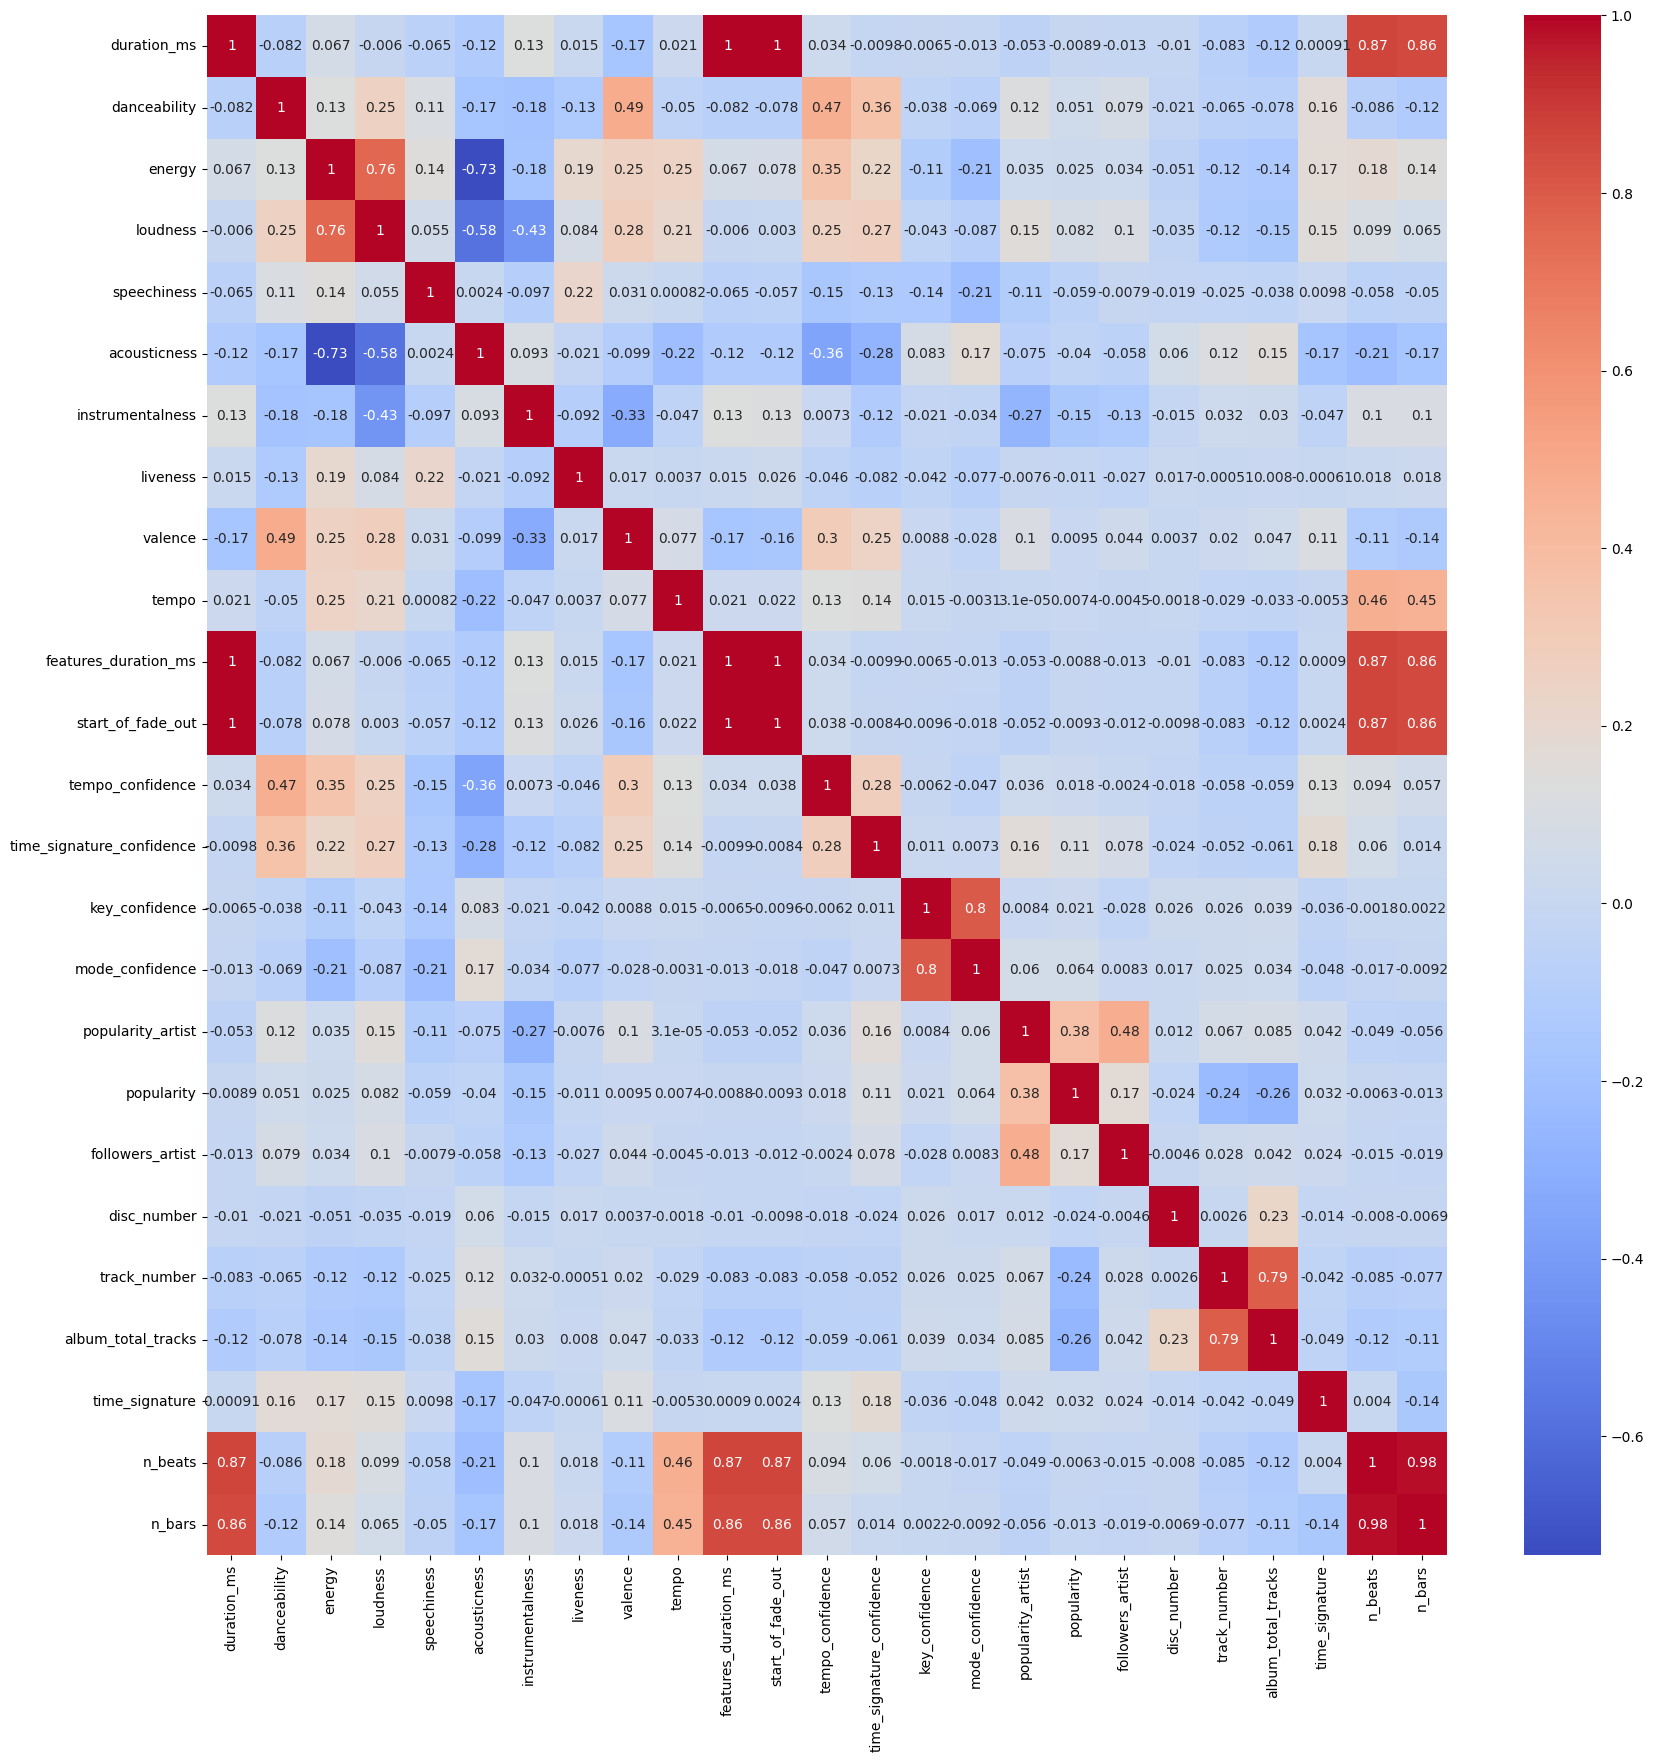

In [141]:
numerical = numerical_continuous + numerical_discrete
df_num = df[(numerical)]
correlation_matrix = df_num.corr(method="pearson")


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [142]:
col_to_drop = ['n_beats', 'n_bars', 'features_duration_ms', 'start_of_fade_out']
df = df.drop(columns = col_to_drop)

In [143]:
df.shape

(88554, 31)

## Plot Categorical

<Axes: xlabel='count', ylabel='explicit'>

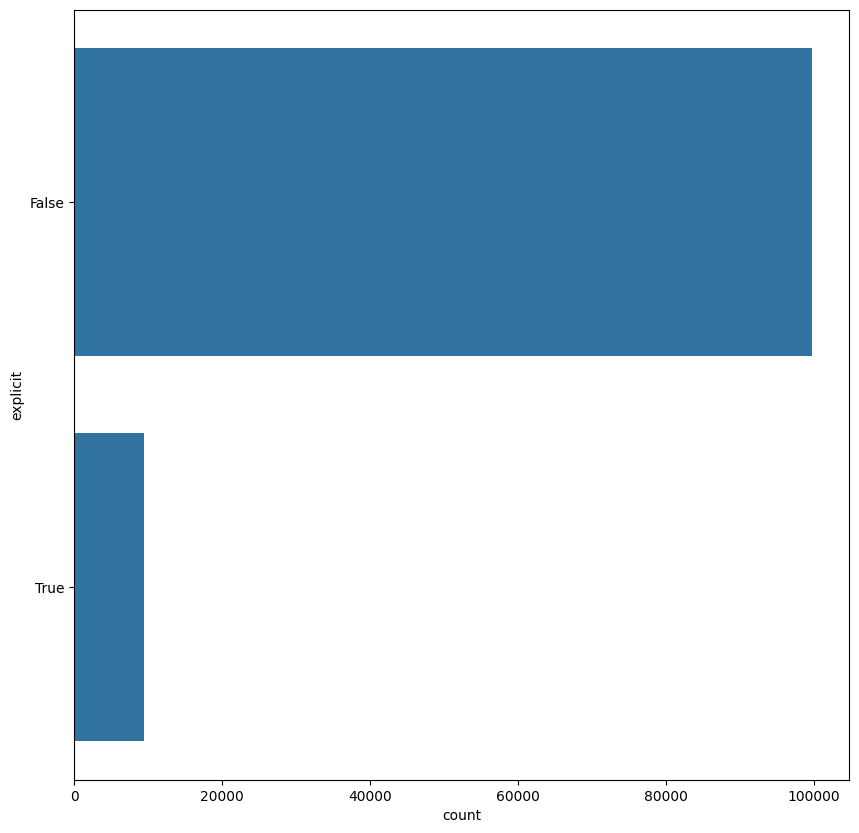

In [144]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_tracks, y = "explicit")

<Axes: xlabel='count', ylabel='key'>

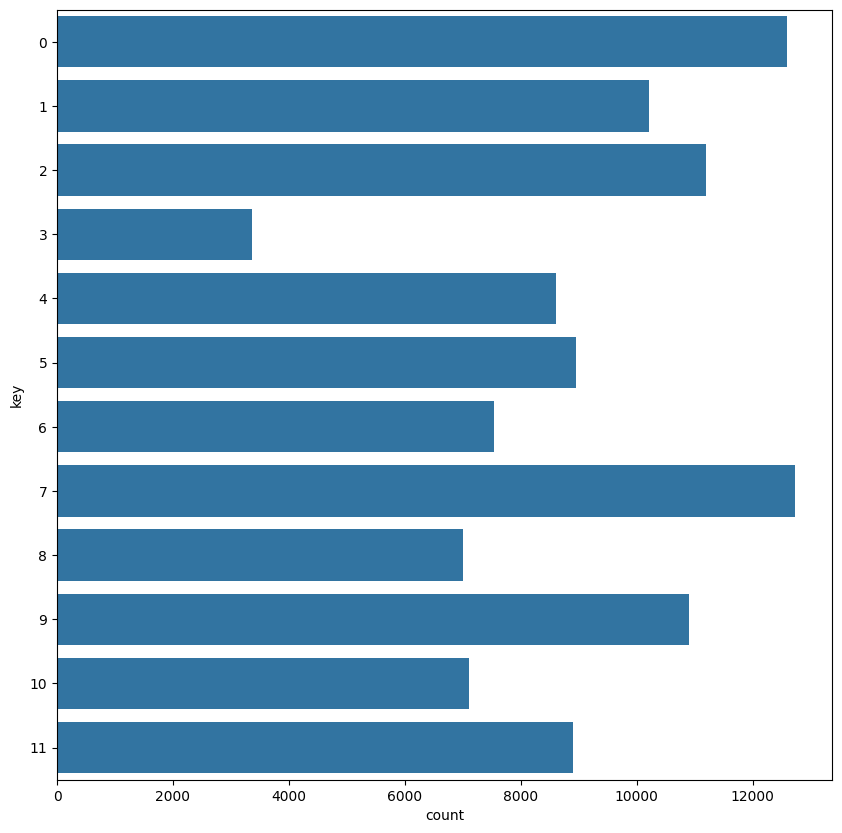

In [145]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_tracks, y = "key")

<Axes: xlabel='count', ylabel='time_signature'>

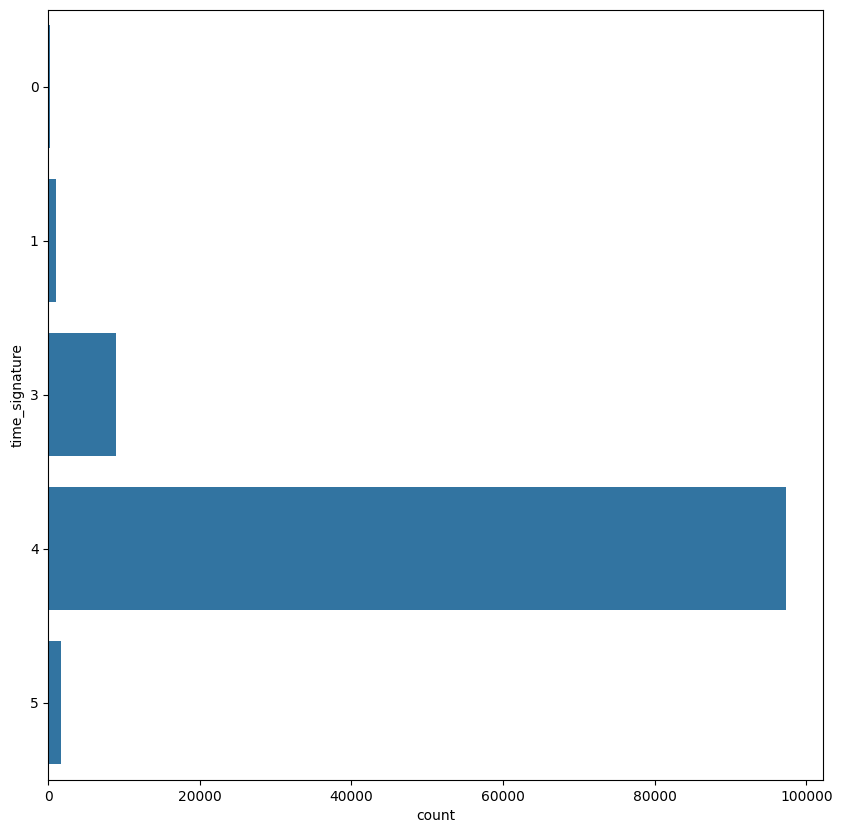

In [146]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_tracks, y = "time_signature")

<Axes: xlabel='count', ylabel='mode'>

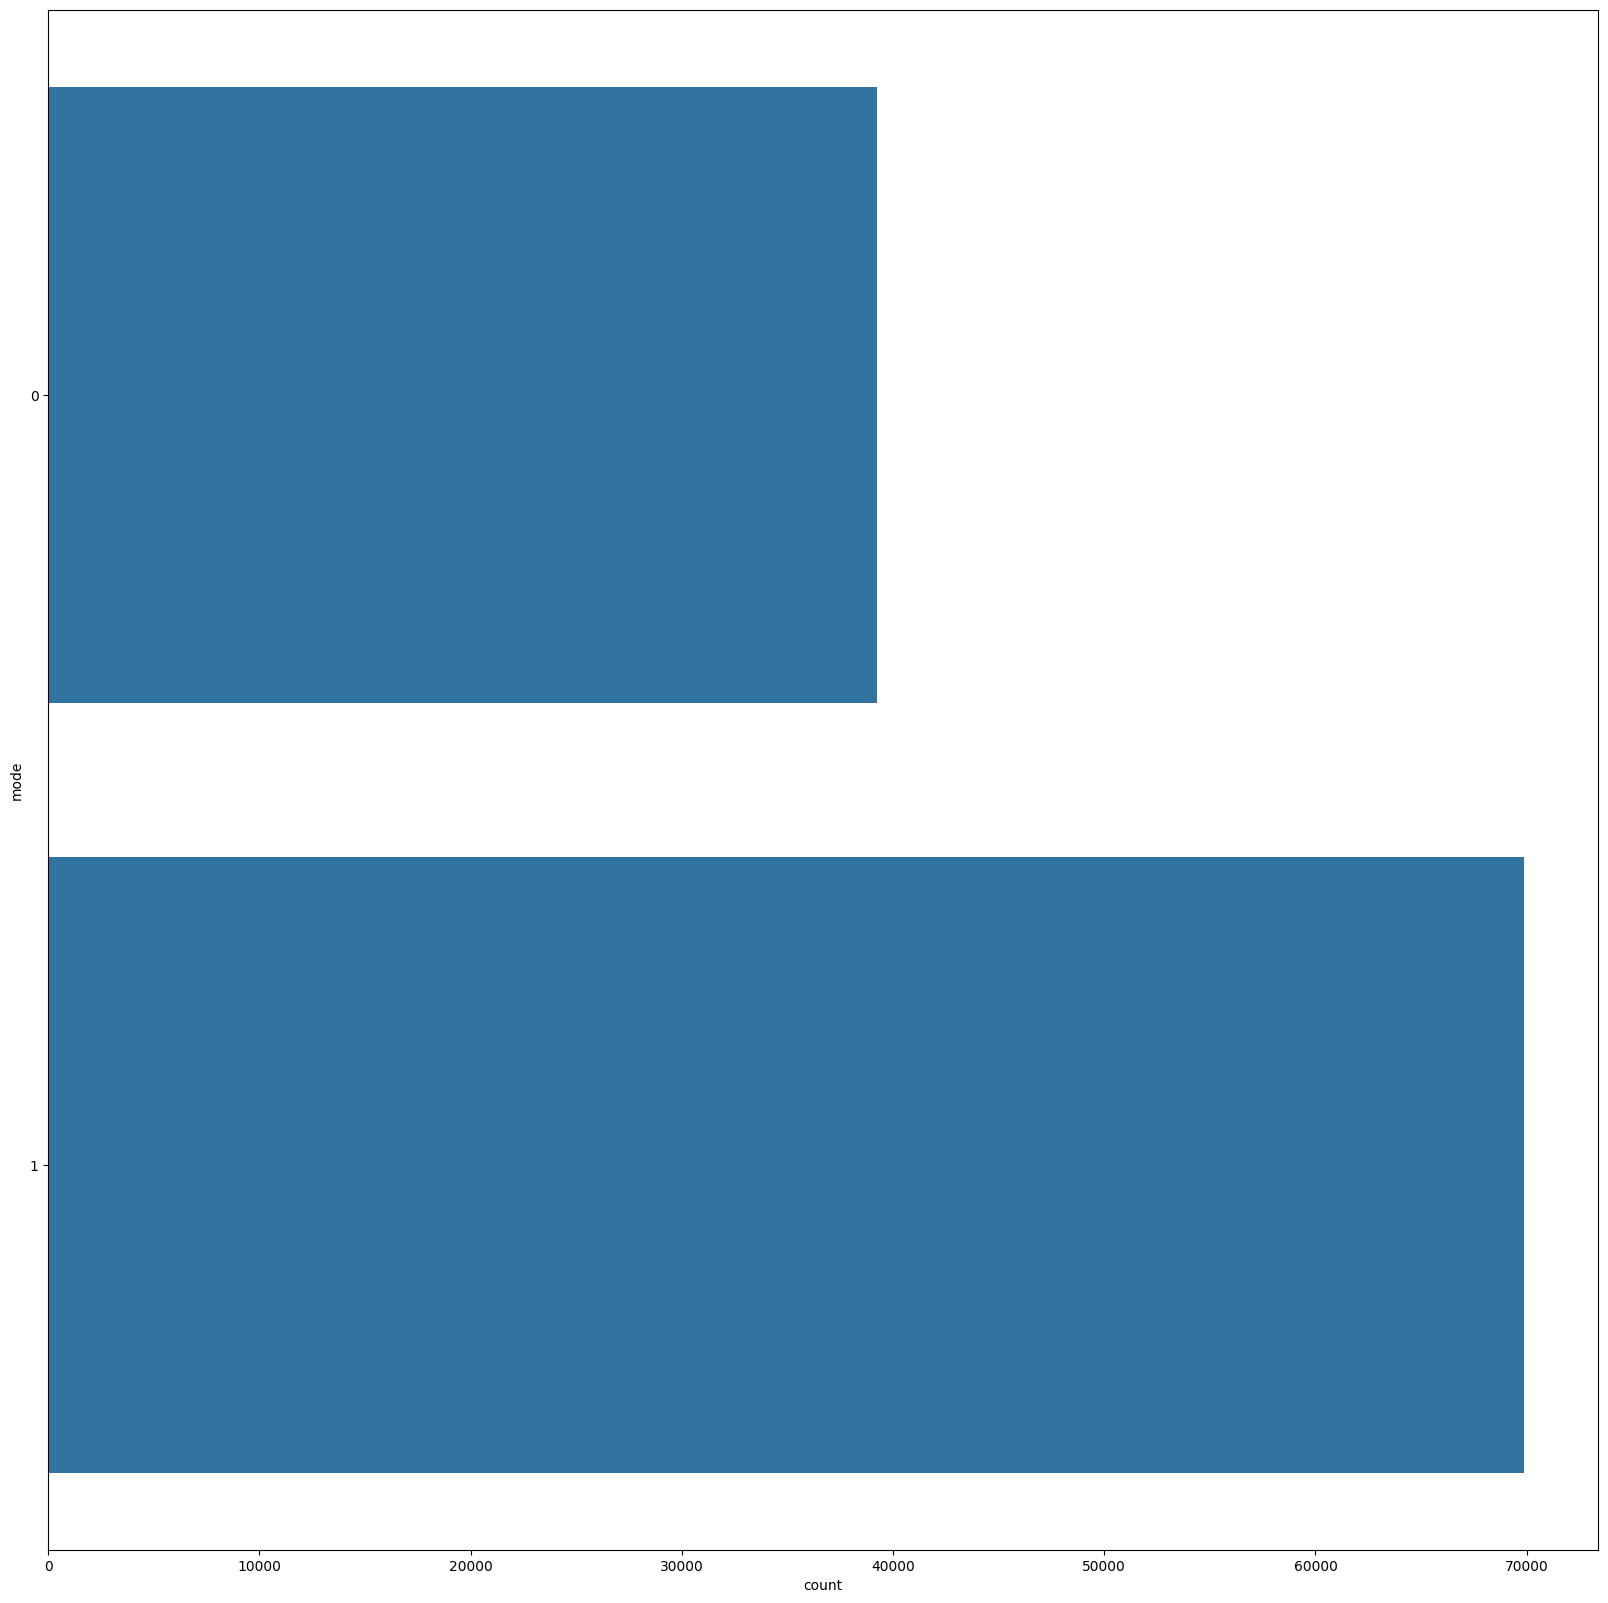

In [147]:
plt.figure(figsize=(20,20))
sns.countplot(data=df_tracks, y = "mode")

## Plot Numerical

In [148]:
numerical_continuous = set(numerical_continuous) - set(['features_duration_ms', 'start_of_fade_out'])
df_num_cont = df[numerical_continuous]

TypeError: Passing a set as an indexer is not supported. Use a list instead.

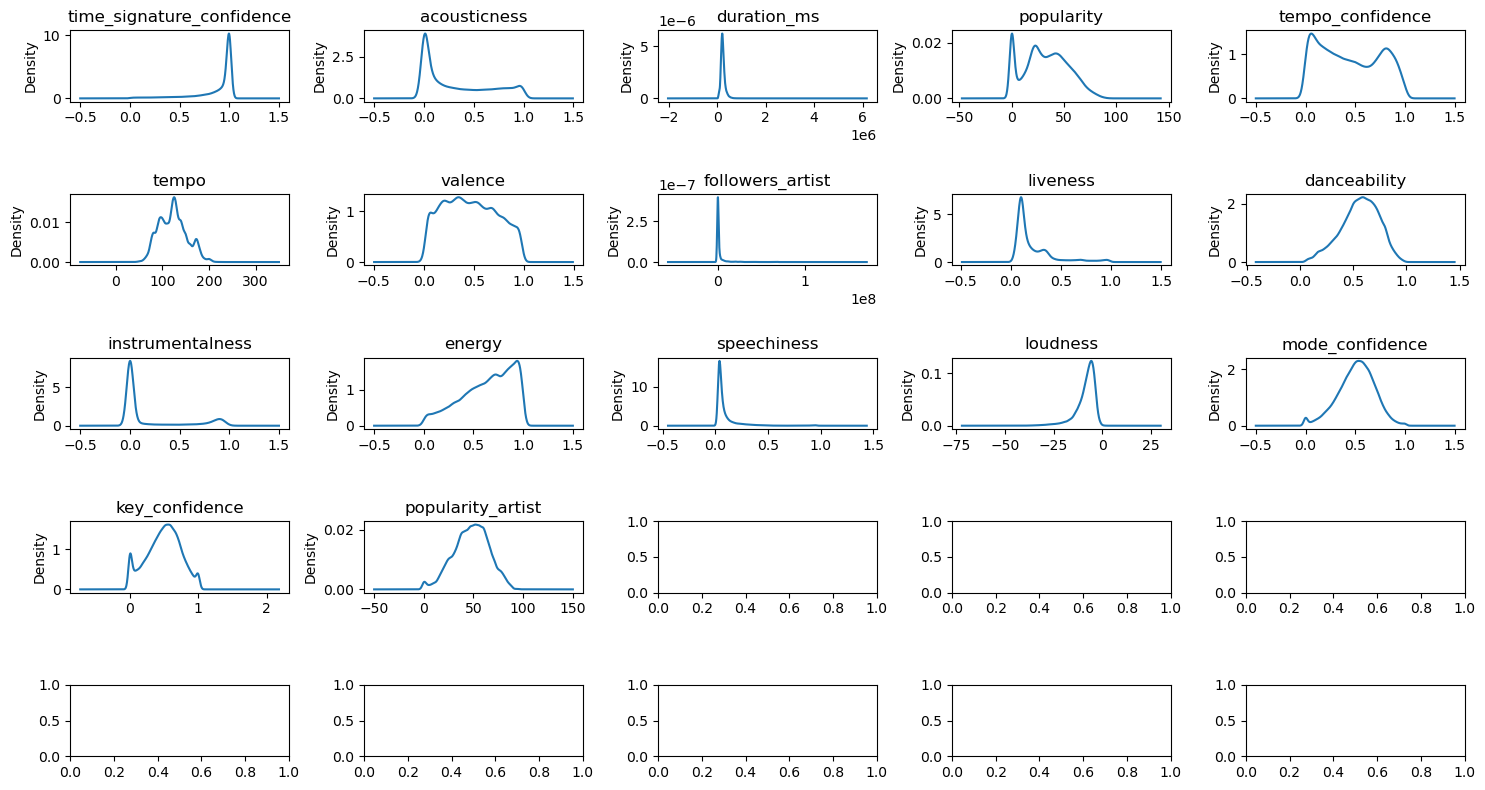

In [ ]:
# Visualizing the distribution of key numerical features

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,8))

for i, var in enumerate(df_num_cont.columns): #to_plot
    row = i // 5
    col = i % 5
    df_num[var].plot(kind="kde",ax=axes[row,col])
    axes[row,col].set_title(var)
    
plt.tight_layout()
plt.show()

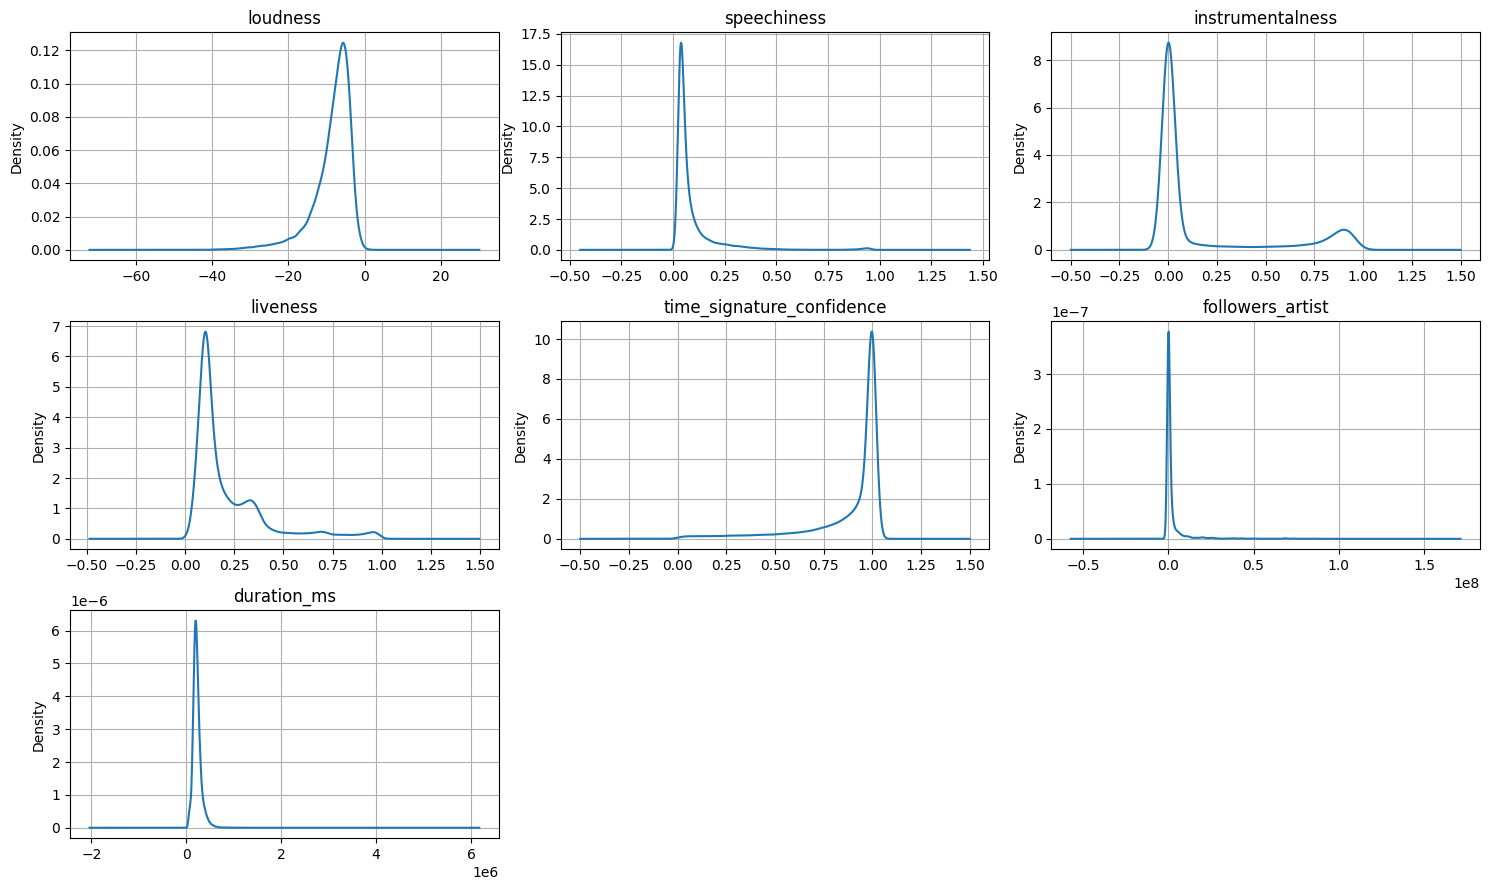

In [153]:
to_plot = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 
     'time_signature_confidence', 'followers_artist', 'duration_ms']


# Select the relevant columns from the DataFrame
df_num_to_plot = df[to_plot]

# Determine the number of subplots needed
num_vars = len(to_plot)
cols = 3  # Number of columns in the subplot grid
rows = (num_vars + cols - 1) // cols  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 3 * rows))

# Flatten axes array for easy iteration in case of single row/column
axes = axes.flatten() if num_vars > 1 else [axes]

# Plot each variable
for i, var in enumerate(df_num_to_plot.columns):
    df_num_to_plot[var].plot(kind="kde", ax=axes[i])
    axes[i].set_title(var)
    axes[i].grid(True)  # Optional: Add grid for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Skewness analysis

In [157]:
df_num_to_plot.dtypes

loudness                     float64
speechiness                  float64
instrumentalness             float64
liveness                     float64
time_signature_confidence    float64
followers_artist             float64
duration_ms                    int64
dtype: object

In [155]:
"""
|Skewness| < 0.5: Approximately symmetric.
0.5 ≤ |Skewness| < 1: Moderately skewed.
|Skewness| ≥ 1: Highly skewed.
"""

'\n|Skewness| < 0.5: Approximately symmetric.\n0.5 ≤ |Skewness| < 1: Moderately skewed.\n|Skewness| ≥ 1: Highly skewed.\n'

In [158]:
# Initialize an empty dictionary to store the results
results = {'Variable': [], 'Excess Kurtosis': [], 'Skewness': []}

for f in df_num_to_plot:
    # Append the results to the dictionary
    results['Variable'].append(f)
    results['Excess Kurtosis'].append(kurtosis(df_num_to_plot[f]))
    results['Skewness'].append(skew(df_num_to_plot[f]))

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)
results_df['Skewness_abs'] = abs(results_df['Skewness'])

# Print the DataFrame
print(results_df.sort_values(by="Skewness_abs", ascending=False))

                    Variable  Excess Kurtosis  Skewness  Skewness_abs
5           followers_artist        54.694919  6.583718      6.583718
6                duration_ms       102.149615  5.238214      5.238214
1                speechiness        26.738837  4.539280      4.539280
4  time_signature_confidence         4.579711 -2.253083      2.253083
3                   liveness         4.128893  2.069493      2.069493
0                   loudness         5.397553 -1.942506      1.942506
2           instrumentalness         0.733050  1.580302      1.580302


## DateTime Analysis

In [159]:
df_tracks['album_release_date'].value_counts()

album_release_date
2022-10-07    4372
2022-10-21    3920
2022-10-14    3548
2022-10-20    1131
2022-10-19    1096
2022-10-12     985
2022-10-11     863
2022-10-13     773
2022-10-18     676
2022-10-17     665
2013-01-01     358
2022-10-06     340
2006-01-01     335
2005-01-01     325
2011-01-01     307
2012-01-01     290
2010-01-01     265
2001-01-01     261
2005           259
2007-01-01     256
2008-01-01     255
2022-09-16     254
2004-01-01     241
2014-01-01     239
1998-01-01     236
2004           235
2003-01-01     226
2022-09-23     222
2002           222
2022-10-05     222
2009-01-01     221
2022-10-10     220
2001           215
2022-05-27     213
1998           207
2000-01-01     207
2022-09-30     205
2006           203
2007           202
2022-10-08     201
2022-09-02     199
2022-08-26     196
2022-05-06     194
2021-11-19     191
2022-09-09     190
2022-07-15     189
1997-01-01     188
2022-08-05     187
2000           186
2022-05-20     183
2022-08-19     181
2002-01-01  

In [173]:
df.columns

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'genre', 'popularity_artist', 'followers_artist'],
      dtype='object')

In [175]:
df['album_release_date'].unique()

array(['2022-09-23', '2021-02-11', '2014-05-30', ..., '1991-09-10',
       '2000-07-12', '2008-12-06'], shape=(8749,), dtype=object)

In [176]:
df = df.drop(columns=['album_release_date'])

## Correlation

In [178]:
df_artist_correlation = df_artists_clean.corr(numeric_only=True)

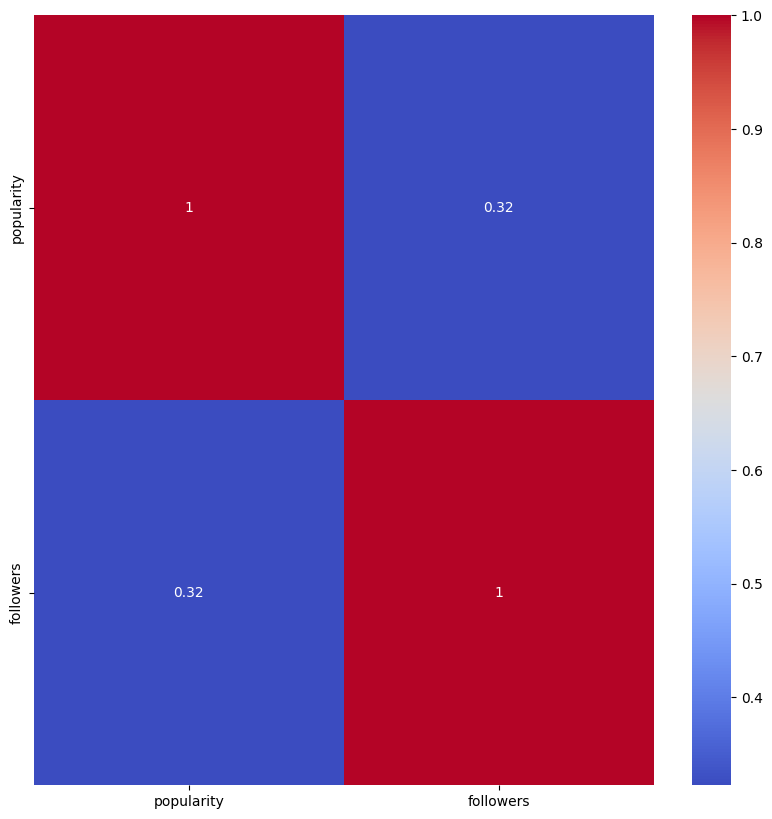

In [179]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_artist_correlation, annot=True, cmap='coolwarm')
plt.show()


## Plot Comparison

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_4592/331495460.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_tracks, x='acousticness', y='energy', palette='viridis', alpha=0.6)


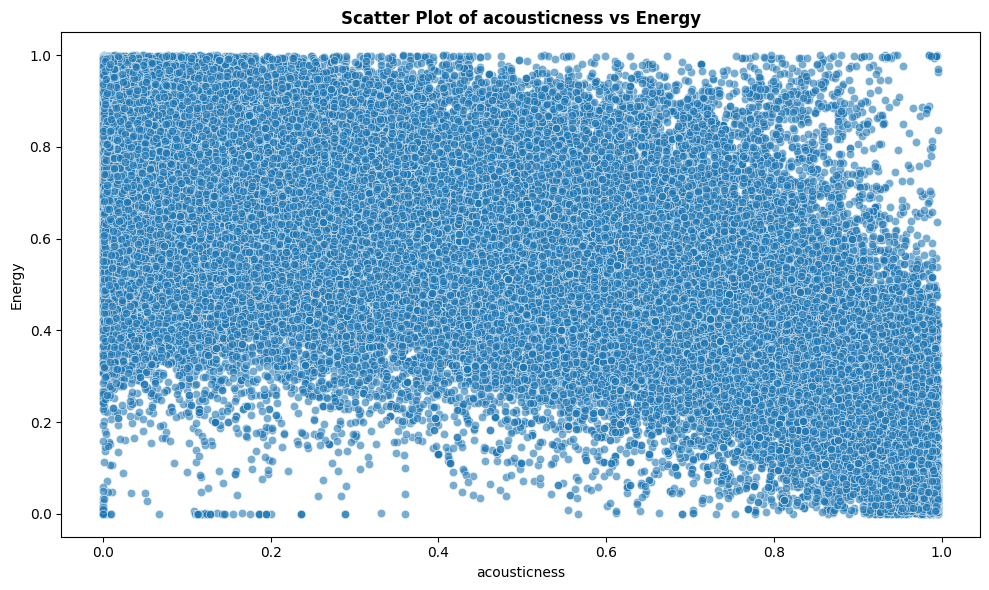

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tracks, x='acousticness', y='energy', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of acousticness vs Energy', fontweight='bold')
plt.xlabel('acousticness')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()


/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_4592/3539553239.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_tracks, x='loudness', y='energy', palette='viridis', alpha=0.6)


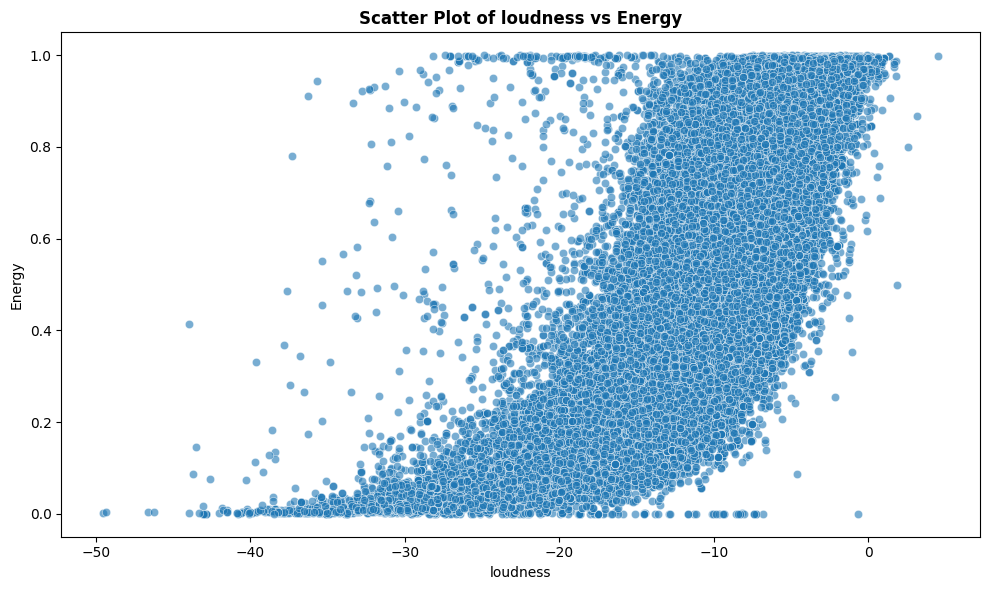

In [181]:
# Crea uno scatter plot tra 'danceability' e 'energy'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tracks, x='loudness', y='energy', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of loudness vs Energy', fontweight='bold')
plt.xlabel('loudness')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()


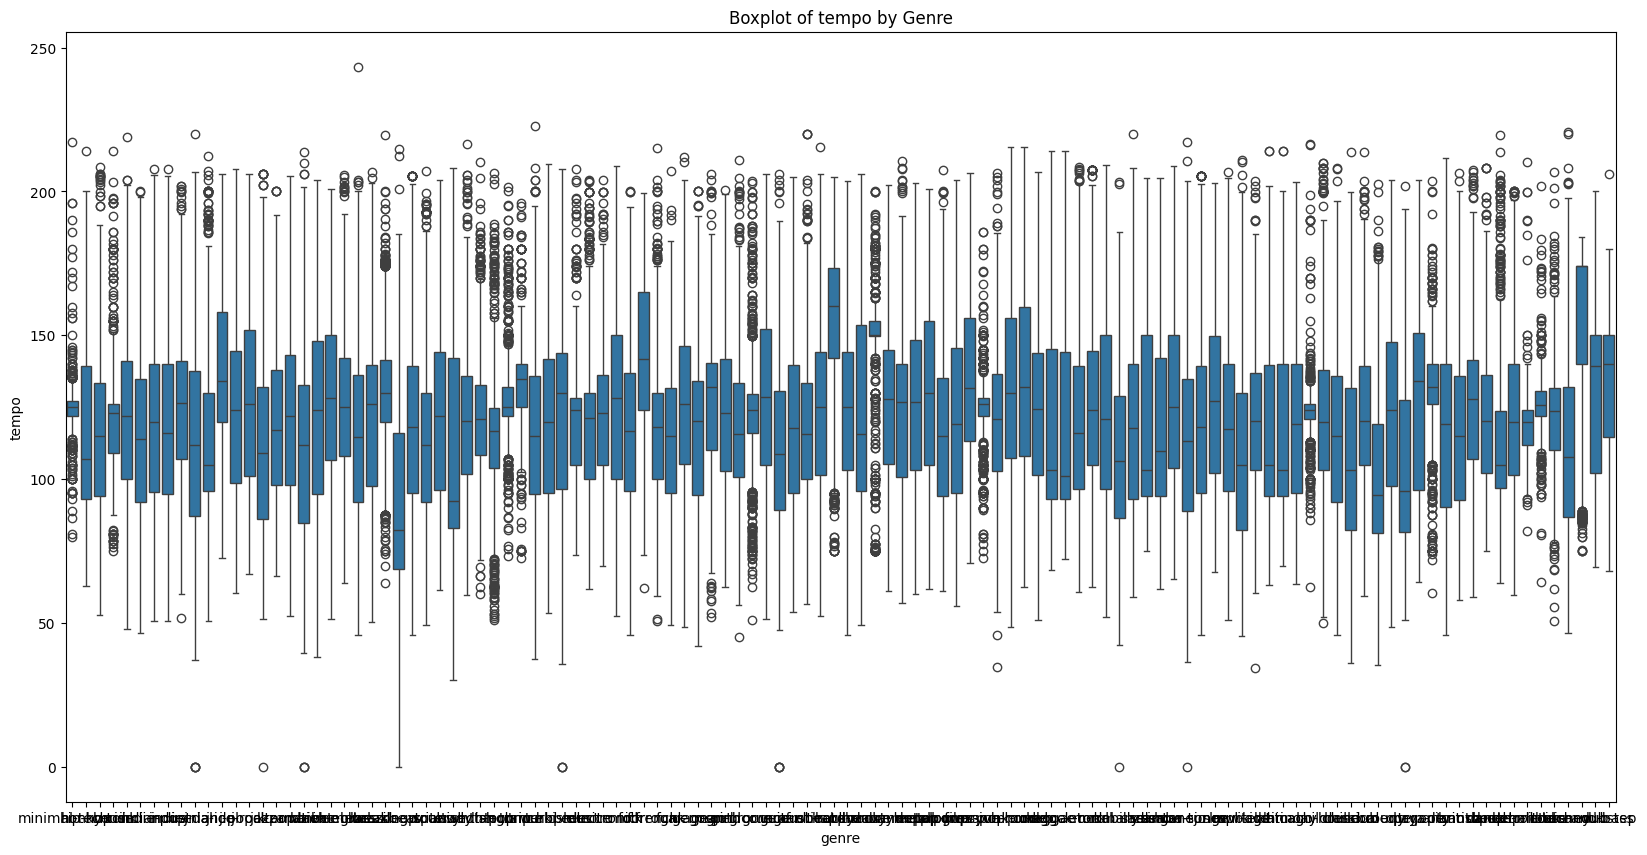

In [182]:
# Create a boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='tempo', data=df_tracks)

plt.title('Boxplot of tempo by Genre')
plt.xlabel('genre')
plt.ylabel('tempo')
plt.show()

In [183]:
df_tracks['tempo'].describe()

count    109149.000000
mean        122.140497
std          30.126312
min           0.000000
25%          98.976000
50%         122.000000
75%         140.122000
max         243.372000
Name: tempo, dtype: float64

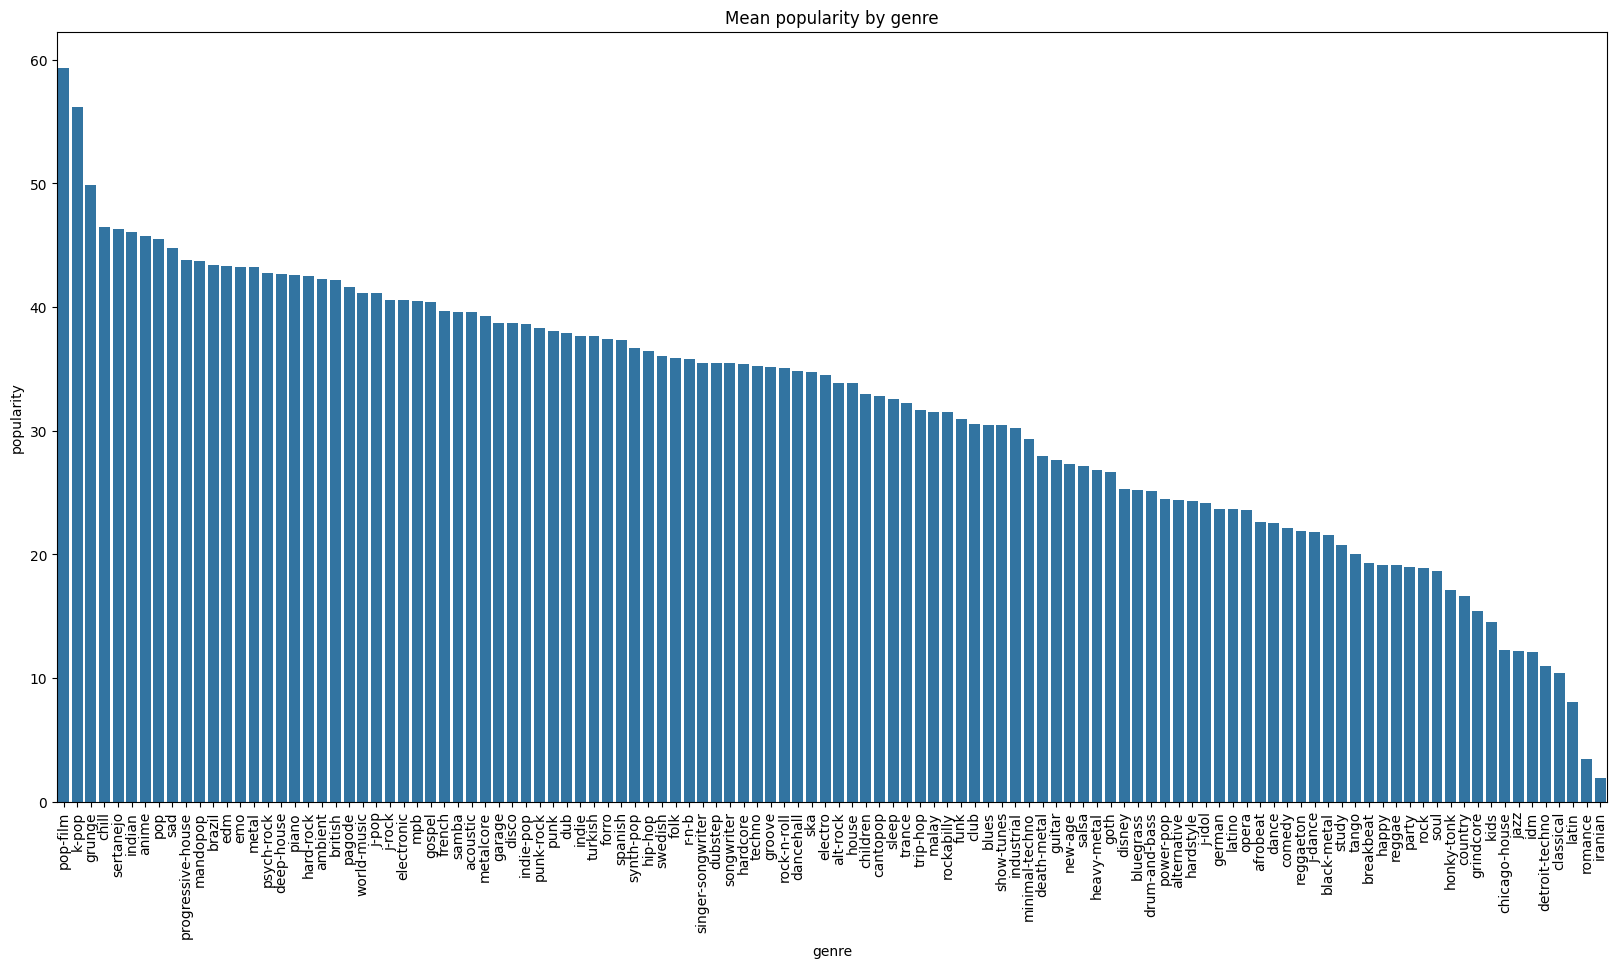

In [190]:
# Create a boxplot
plt.figure(figsize=(20,10))
popularity_mean = df_tracks.groupby('genre')['popularity'].mean()
popularity_mean = popularity_mean.sort_values(ascending=False)

sns.barplot(x=popularity_mean.index, y=popularity_mean.values)


plt.xticks(rotation=90)
plt.title('Mean popularity by genre')
plt.xlabel('genre')
plt.ylabel('popularity')
plt.show()

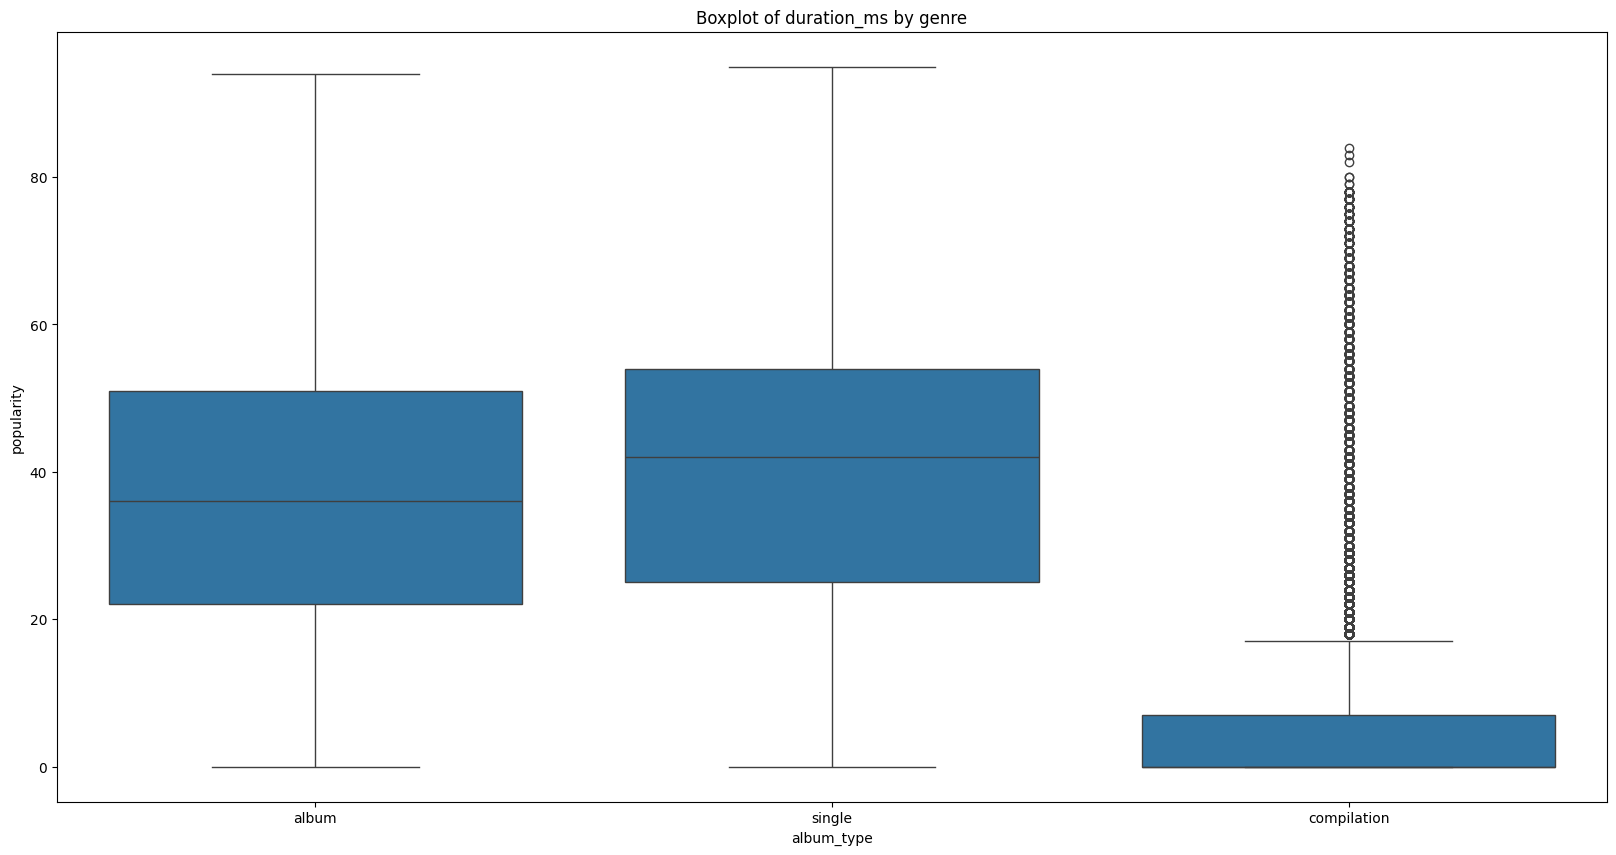

In [191]:
# Create a boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x='album_type', y='popularity', data=df_tracks)

plt.title('Boxplot of duration_ms by genre')
plt.xlabel('album_type')
plt.ylabel('popularity')
plt.show()

## Drop some variables

In [192]:
to_drop = ['name', 'disc_number', 'track_number', 'artists', 'album_type', 'album_name', 'album_release_date_precision', 'album_total_tracks']

df = df.drop(to_drop,axis=1)


In [193]:
# check columns 
print(df.columns)
print(df.shape)

Index(['duration_ms', 'explicit', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'genre', 'popularity_artist', 'followers_artist'],
      dtype='object')
(88554, 22)


# NewFeature

In [194]:
def classify_mood_quadrant(row):
    energy = row['energy']
    valence = row['valence']
    
    if energy > 0.5 and valence > 0.5:
        return 'Happy'   # Q2
    elif energy > 0.5 and valence <= 0.5:
        return 'Angry'   # Q1
    elif energy <= 0.5 and valence > 0.5:
        return 'Relaxed' # Q4
    else:
        return 'Sad'     # Q3


In [195]:
df['mood'] = df.apply(classify_mood_quadrant, axis=1)

In [196]:
df['mood'].value_counts()

mood
Happy      32908
Angry      29932
Sad        18518
Relaxed     7196
Name: count, dtype: int64

In [197]:
df.columns

Index(['duration_ms', 'explicit', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'genre', 'popularity_artist', 'followers_artist',
       'mood'],
      dtype='object')

# Export to CSV

In [198]:
df.to_csv("Data/Processed/final_df.csv")